# Author:

- Huu Khang Nguyen - 7402909
- hkn878@uowmail.edu.au


# Environment:

- Python 3.10.8
- Ubuntu 22.04.2 LTS x86_64
- Without GPU

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from keras import regularizers

2023-05-10 21:39:36.314814: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 21:39:36.337970: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 21:39:36.338476: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 21:39:36.810297: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.__version__

'2.12.0'

## Load & preprocessing the dataset

In [4]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
           'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

df = pd.read_csv('./data/magic04.data', names=columns)


In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Label encoding the class column so that it can be fitted in ANN

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['class'] = le.fit_transform(df['class']) 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in df.columns:
    if(col == 'class'): continue
    scalerData = scaler.fit_transform(df[col].values.reshape(-1, 1))
    df[col] =  scalerData

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,-0.577226,-0.336804,-0.381130,0.062759,-0.148923,0.541042,0.224818,-0.405842,0.476816,-1.497866,0
1,-0.510969,-0.570027,-0.648595,0.820383,1.471776,0.516919,0.260364,-0.490094,-0.815418,0.153125,0
2,2.568278,6.205858,2.615783,-1.875883,-1.773241,2.044992,-1.478536,-2.183030,1.889224,0.842635,0
3,-0.694768,-0.687259,-1.029478,1.282069,1.606608,0.532771,-0.333515,-0.355359,-0.658804,-1.031463,0
4,0.516622,0.476384,0.711157,-0.347506,-0.284660,-0.020200,0.353086,1.036620,-0.881039,2.176427,0


### Split the dataset by 70% training and 30% testing

In [9]:
y = df['class']
X = df.drop(columns=['class'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=70, random_state=42, shuffle=True)

In [11]:
X_train.shape

(70, 10)

In [12]:
num_classes = len(set(y))

In [13]:
from keras.models import Sequential
from keras.layers import Flatten, Dense


In [14]:
model = Sequential([
    Flatten(input_shape=(10,)),
    Dense(100, activation="relu", kernel_regularizer=regularizers.L1L2(1e-5, 1e-4)),
    Dense(100, activation="relu", kernel_regularizer=regularizers.L1L2(1e-5, 1e-4)),
    Dense(num_classes, activation="softmax")
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["sparse_categorical_accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 0s 420ms/step - loss: 0.6998 - sparse_categorical_accuracy: 0.5357 - val_loss: 0.6665 - val_sparse_categorical_accuracy: 0.6429
Epoch 2/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6559 - sparse_categorical_accuracy: 0.7679 - val_loss: 0.6436 - val_sparse_categorical_accuracy: 0.7143
Epoch 3/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6166 - sparse_categorical_accuracy: 0.8036 - val_loss: 0.6239 - val_sparse_categorical_accuracy: 0.7143
Epoch 4/20
1/1 [==============================] - 0s 13ms/step - loss: 0.5819 - sparse_categorical_accuracy: 0.8214 - val_loss: 0.6072 - val_sparse_categorical_accuracy: 0.7143
Epoch 5/20
1/1 [==============================] - 0s 12ms/step - loss: 0.5510 - sparse_categorical_accuracy: 0.8214 - val_loss: 0.5932 - val_sparse_categorical_accuracy: 0.7143
Epoch 6/20
1/1 [==============================] - 0s 12ms/step - loss: 0.5234 - sparse_categorical_accuracy: 0.821

(0.0, 1.0)

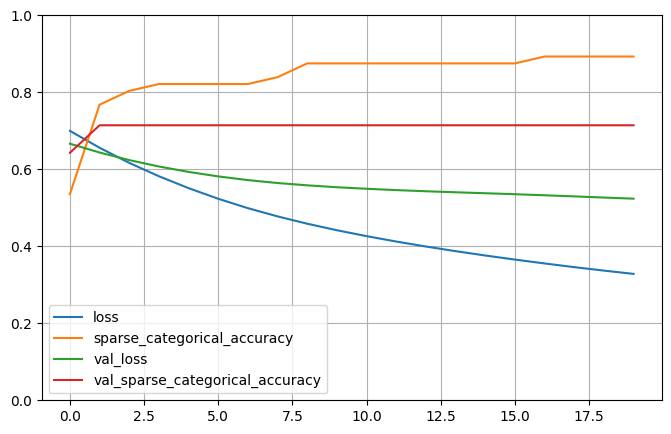

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [18]:
model.evaluate(X_test, y_test)

593/593 [==============================] - 0s 409us/step - loss: 0.6266 - sparse_categorical_accuracy: 0.7085


[0.6266001462936401, 0.7084960341453552]

In [19]:
prob = model.predict(X_test)

593/593 [==============================] - 0s 341us/step


In [20]:
prob

array([[0.71945715, 0.28054285],
       [0.9580336 , 0.04196644],
       [0.8906502 , 0.10934976],
       ...,
       [0.87829596, 0.12170409],
       [0.8187299 , 0.18127017],
       [0.9477197 , 0.05228031]], dtype=float32)

In [21]:
prediction = np.argmax(prob, axis=-1)

In [22]:
prediction_with_label = le.inverse_transform(prediction)

In [23]:
prediction_with_label

array(['g', 'g', 'g', ..., 'g', 'g', 'g'], dtype=object)

## Hyperparameter fine-tunning

Here I created a function to build an ANN model with 4 hyperparameters:
- `n_hidden`: number of hidden layers
- `n_neurons`: number of neurons for each layer
- `optimizer`: optimization algorithm (e.g Adam, SGD)
- `l1`, `l2`: regulization parameters for L1 and L2, respectively

In [24]:
def build_model(n_hidden=1, n_neurons=30, optimizer='adam', input_shape=(10,), l1=1e5, l2=1e-4):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu", kernel_regularizer=regularizers.L1L2(l1,l2)))

    # output layer
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


In [25]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

/tmp/ipykernel_1080623/1341954221.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [26]:
from sklearn.model_selection import GridSearchCV
param_distribs = {
    "n_hidden": [2, 4, 6, 8, 10],
    "n_neurons": [100, 200, 300],
    "optimizer": ['SGD', 'adam'],
    "l1": [1e-5, 1e-4, 1e-2],
    "l2": [1e-5, 1e-4, 1e-2],
}
rnd_search_cv = GridSearchCV(keras_clf, param_distribs, cv=5, n_jobs=-1)
history = rnd_search_cv.fit(X_train, y_train, epochs=20, batch_size=100, verbose=0, validation_split=0.2)


2023-05-10 21:39:41.751580: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 21:39:41.836358: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 21:39:41.837974: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 21:39:41.881565: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 21:39:41.886144: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 21:39:41.891486: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 21:39:41.902959: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 21:39:41.907618: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-

1/1 [==============================] - 0s 16ms/step - loss: 26.1999 - accuracy: 0.7857


/home/huukhang1512/.local/share/virtualenvs/lab8-n1-oXRNz/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


1/1 [==============================] - 0s 21ms/step - loss: 19.1595 - accuracy: 0.7143


2023-05-10 21:42:12.190810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


1/1 [==============================] - 0s 17ms/step - loss: 31.0945 - accuracy: 0.8571


2023-05-10 21:42:13.201207: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 18ms/step - loss: 26.0539 - accuracy: 0.8571


2023-05-10 21:42:36.657362: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


1/1 [==============================] - 0s 19ms/step - loss: 26.0233 - accuracy: 0.6429


2023-05-10 21:42:37.316896: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


1/1 [==============================] - 0s 16ms/step - loss: 19.1283 - accuracy: 0.9286


2023-05-10 21:42:37.589813: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 24ms/step - loss: 19.2180 - accuracy: 0.7143


2023-05-10 21:42:37.984107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


1/1 [==============================] - 0s 27ms/step - loss: 45.9247 - accuracy: 0.8571


2023-05-10 21:42:38.292528: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-10 21:42:38.399374: W tensorflow/core/data/root_dataset.cc:273] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 29ms/step - loss: 45.9014 - accuracy: 0.9286


2023-05-10 21:42:38.697475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 21:42:38.978155: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 17ms/step - loss: 31.2481 - accuracy: 0.7143


2023-05-10 21:42:39.646494: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 18ms/step - loss: 132.5446 - accuracy: 0.7143


2023-05-10 21:42:43.138213: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


1/1 [==============================] - 0s 23ms/step - loss: 89.3009 - accuracy: 0.7143


2023-05-10 21:42:44.121526: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 17ms/step - loss: 215.8799 - accuracy: 0.8571


2023-05-10 21:42:57.415785: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


1/1 [==============================] - 0s 20ms/step - loss: 215.7887 - accuracy: 0.7143


2023-05-10 21:42:58.373894: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 18ms/step - loss: 263.3092 - accuracy: 0.7857


2023-05-10 21:43:01.815033: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


1/1 [==============================] - 0s 18ms/step - loss: 27.8528 - accuracy: 0.7143


2023-05-10 21:43:02.750597: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 17ms/step - loss: 86.4622 - accuracy: 0.7143


2023-05-10 21:43:19.701307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 21:43:20.438432: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-10 21:43:20.647517: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 21ms/step - loss: 69.3904 - accuracy: 0.7857


2023-05-10 21:43:21.447037: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 10ms/step - loss: 277.3224 - accuracy: 0.7143


In [27]:
best_params = rnd_search_cv.best_params_
best_params

{'l1': 1e-05,
 'l2': 1e-05,
 'n_hidden': 4,
 'n_neurons': 200,
 'optimizer': 'adam'}

In [28]:
rnd_search_cv.best_score_

0.8571428537368775

In [29]:
tuned_ann = rnd_search_cv.best_estimator_.model
tuned_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 200)               2200      
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 200)               40200     
                                                                 
 dense_6 (Dense)             (None, 200)               40200     
                                                                 
 dense_7 (Dense)             (None, 2)                 402       
                                                                 
Total params: 123,202
Trainable params: 123,202
Non-tr

In [31]:
best_ann = build_model(
    n_hidden=best_params['n_hidden'], n_neurons=best_params['n_neurons'], optimizer=best_params['optimizer'], l1=best_params['l1'], l2=best_params['l2']
)

best_history = best_ann.fit(X_train, y_train, batch_size=100, epochs=20, validation_split=0.2)


Epoch 1/20
1/1 [==============================] - 1s 545ms/step - loss: 0.7581 - accuracy: 0.7143 - val_loss: 0.7228 - val_accuracy: 0.7143
Epoch 2/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6833 - accuracy: 0.8393 - val_loss: 0.6869 - val_accuracy: 0.7143
Epoch 3/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6200 - accuracy: 0.8393 - val_loss: 0.6575 - val_accuracy: 0.7143
Epoch 4/20
1/1 [==============================] - 0s 13ms/step - loss: 0.5644 - accuracy: 0.8393 - val_loss: 0.6394 - val_accuracy: 0.7143
Epoch 5/20
1/1 [==============================] - 0s 19ms/step - loss: 0.5145 - accuracy: 0.8393 - val_loss: 0.6331 - val_accuracy: 0.7143
Epoch 6/20
1/1 [==============================] - 0s 16ms/step - loss: 0.4725 - accuracy: 0.8393 - val_loss: 0.6380 - val_accuracy: 0.7143
Epoch 7/20
1/1 [==============================] - 0s 14ms/step - loss: 0.4396 - accuracy: 0.8750 - val_loss: 0.6488 - val_accuracy: 0.7143
Epoch 8/20
1/1 [==========

In [32]:
probs = best_ann.predict(X_test)

593/593 [==============================] - 0s 418us/step


In [33]:
predictions = np.argmax(probs, axis=-1)

In [34]:
best_ann.evaluate(X_test, y_test)

593/593 [==============================] - 0s 510us/step - loss: 0.7351 - accuracy: 0.7770


[0.735068142414093, 0.7770448327064514]

=> Accuarcy improves from 70% to 77.7%

# Learning curve and test accuracy

(0.0, 1.0)

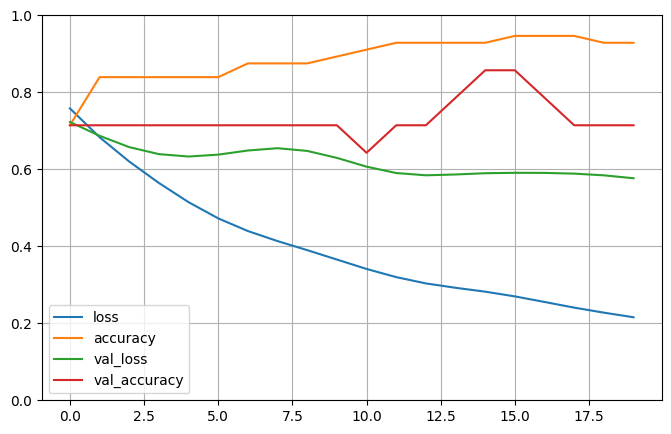

In [35]:
pd.DataFrame(best_history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1)